In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
df = pd.read_csv('/content/Boston.csv')

In [3]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Select and Categorize the "CRIM" Variable

- Load the dataset (e.g., Boston Housing dataset from scikit-learn).
Select the "crim" variable and convert it into categorical values:
        If crim < 3.5, classify it as Low Crime.
        If crim >= 3.5, classify it as High Crime.

In [5]:
df['crim_Category'] = df['crim'].apply(lambda x: 'Low Crime' if x < 3.5 else 'High Crime')

## Split the Data

In [6]:
le = LabelEncoder()
df['crim_Category_encode'] = le.fit_transform(df['crim_Category'])

y = df['crim_Category_encode']
X = df.drop(['crim', 'crim_Category', 'crim_Category_encode'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
X.columns

Index(['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

## Normalize the Training Data

In [12]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **K-Nearest Neighbors Implementation**

## Train the KNN Model

Train the KNN model with different values of k.

In [13]:
k_candidates = [1, 3, 5, 7, 9]

for k in k_candidates:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f'Accuracy with k={k}:  %{acc*100:.2f}')


Accuracy with k=1:  %100.00
Accuracy with k=3:  %100.00
Accuracy with k=5:  %100.00
Accuracy with k=7:  %100.00
Accuracy with k=9:  %100.00


$↓$

For each k in `k_candidates`, KNN Classifier classifies all of the test data correctly.

## Confusion Matrix & Explain the Results


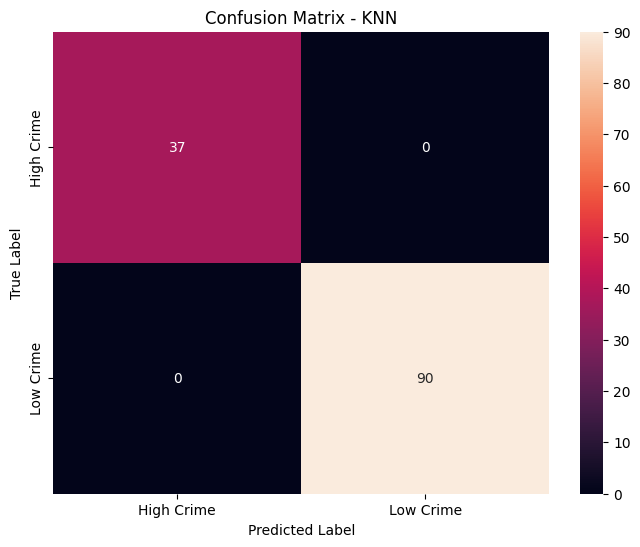

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

$↓$

As the Confusion Matrix demonstrates, all of the test data have been classified correctly by KNN Classifier where k=3.

# **Decision Tree Implementation**

## Fitting DT to the Boston Dataset

In [15]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

y_pred_dt = dt.predict(X_test_scaled)

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print("Classification Report:\n", classification_report(y_test, y_pred_dt, target_names=le.classes_))

Classification Report:
               precision    recall  f1-score   support

  High Crime       1.00      1.00      1.00        37
   Low Crime       1.00      1.00      1.00        90

    accuracy                           1.00       127
   macro avg       1.00      1.00      1.00       127
weighted avg       1.00      1.00      1.00       127



## Confusion Matrix & Explain the Results

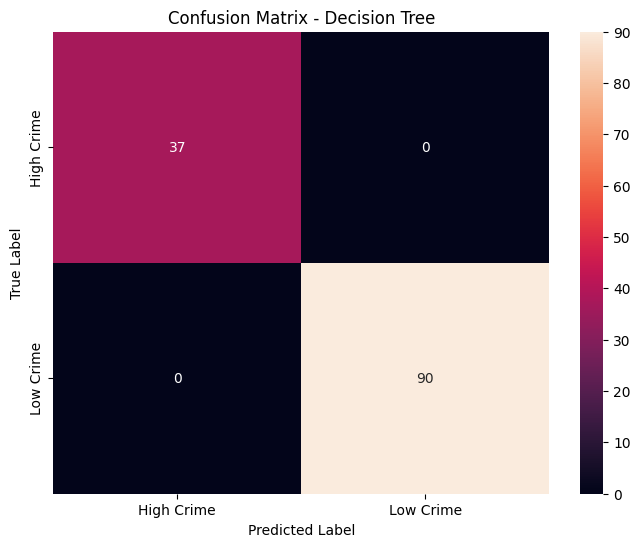

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

$↓$

As the Confusion Matrix demonstrates, all of the test data have been classified correctly by Decision Tree Classifier.

In other words, $\quad\quad Missclassification Error = 0$.

## Tree Visualization

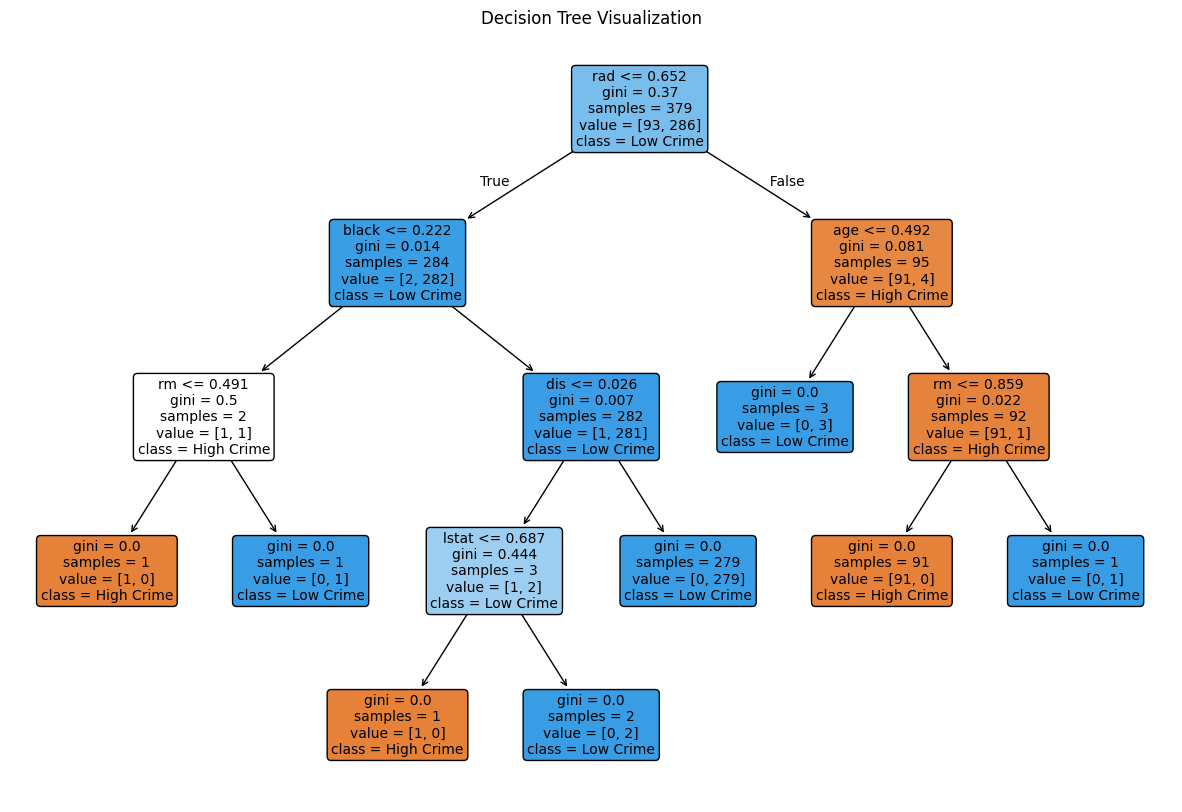

In [17]:
plt.figure(figsize=(15, 10))
plot_tree(dt, feature_names=X.columns, class_names=le.classes_, filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

$⇓$

In all leaves, `impurity` is *zero*.

So:    $\quad\quad Missclassification Error = 0$.
